In [49]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas

In [50]:
df = spark.read.format("csv").option("header","true").load("./2010_RD_Scoreboard_Global_cleaned_constructed_done.csv")

In [51]:
df.count()

1000

In [52]:
df.describe().show()

+-------+--------------------+-----------------+---------+--------------------+--------+-----------------+------------------+--------------------+--------------+-------------------+---------------------------+---------------------------+----------------------------------+-----------------------+--------------------+------------------+--------------+----------------------+----------------------+-------------------------+------------------+------------------+------------------+------------------+----------------------+----------------------+------------------+----------------------------+----------------------------+---------------------+------------------+------------------+----------------------+-----------------+-----------------+-----------------+------------------+
|summary|             Company|       Company ID|  Country|       Country GDP $|Not IFRS|   Industry group|          ICB code|Industry description|Listing status|2009 R&D investment|1 Yr R&D investment growth%|4 Yr R&D inv

In [53]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Company ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country GDP $: string (nullable = true)
 |-- Not IFRS: string (nullable = true)
 |-- Industry group: string (nullable = true)
 |-- ICB code: string (nullable = true)
 |-- Industry description: string (nullable = true)
 |-- Listing status: string (nullable = true)
 |-- 2009 R&D investment: string (nullable = true)
 |-- 1 Yr R&D investment growth%: string (nullable = true)
 |-- 4 Yr R&D investment growth%: string (nullable = true)
 |-- R&D investment / operation profit%: string (nullable = true)
 |-- R&D investment / sales%: string (nullable = true)
 |-- R&D + capex / sales%: string (nullable = true)
 |-- Operating profit: string (nullable = true)
 |-- If made profit: string (nullable = true)
 |-- 1 Yr operating profit%: string (nullable = true)
 |-- 4 Yr operating profit%: string (nullable = true)
 |-- Operating profit / sales%: string (nullable = true)
 |-- 

In [54]:
df.columns

['Company',
 'Company ID',
 'Country',
 'Country GDP $',
 'Not IFRS',
 'Industry group',
 'ICB code',
 'Industry description',
 'Listing status',
 '2009 R&D investment',
 '1 Yr R&D investment growth%',
 '4 Yr R&D investment growth%',
 'R&D investment / operation profit%',
 'R&D investment / sales%',
 'R&D + capex / sales%',
 'Operating profit',
 'If made profit',
 '1 Yr operating profit%',
 '4 Yr operating profit%',
 'Operating profit / sales%',
 'Sales',
 '1 Yr sales growth%',
 '4 Yr sales growth%',
 'Employees',
 '1 Yr employees growth%',
 '4 Yr employees growth%',
 'R&D / employees ',
 '1 Yr R&D / employees growth%',
 '4 Yr R&D / employees growth%',
 'Sales outside region%',
 'Market cap',
 'Market cap change%',
 'If market cap increase',
 'R&D spend 2008',
 'R&D spend 2007',
 'R&D spend 2006',
 'R&D spend 2005']

In [55]:
df.dtypes

[('Company', 'string'),
 ('Company ID', 'string'),
 ('Country', 'string'),
 ('Country GDP $', 'string'),
 ('Not IFRS', 'string'),
 ('Industry group', 'string'),
 ('ICB code', 'string'),
 ('Industry description', 'string'),
 ('Listing status', 'string'),
 ('2009 R&D investment', 'string'),
 ('1 Yr R&D investment growth%', 'string'),
 ('4 Yr R&D investment growth%', 'string'),
 ('R&D investment / operation profit%', 'string'),
 ('R&D investment / sales%', 'string'),
 ('R&D + capex / sales%', 'string'),
 ('Operating profit', 'string'),
 ('If made profit', 'string'),
 ('1 Yr operating profit%', 'string'),
 ('4 Yr operating profit%', 'string'),
 ('Operating profit / sales%', 'string'),
 ('Sales', 'string'),
 ('1 Yr sales growth%', 'string'),
 ('4 Yr sales growth%', 'string'),
 ('Employees', 'string'),
 ('1 Yr employees growth%', 'string'),
 ('4 Yr employees growth%', 'string'),
 ('R&D / employees ', 'string'),
 ('1 Yr R&D / employees growth%', 'string'),
 ('4 Yr R&D / employees growth%', 's

In [56]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Company ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country GDP $: string (nullable = true)
 |-- Not IFRS: string (nullable = true)
 |-- Industry group: string (nullable = true)
 |-- ICB code: string (nullable = true)
 |-- Industry description: string (nullable = true)
 |-- Listing status: string (nullable = true)
 |-- 2009 R&D investment: string (nullable = true)
 |-- 1 Yr R&D investment growth%: string (nullable = true)
 |-- 4 Yr R&D investment growth%: string (nullable = true)
 |-- R&D investment / operation profit%: string (nullable = true)
 |-- R&D investment / sales%: string (nullable = true)
 |-- R&D + capex / sales%: string (nullable = true)
 |-- Operating profit: string (nullable = true)
 |-- If made profit: string (nullable = true)
 |-- 1 Yr operating profit%: string (nullable = true)
 |-- 4 Yr operating profit%: string (nullable = true)
 |-- Operating profit / sales%: string (nullable = true)
 |-- 

In [57]:
TargetData = pandas.read_csv("./2010_RD_Scoreboard_Global_cleaned_constructed_done.csv")

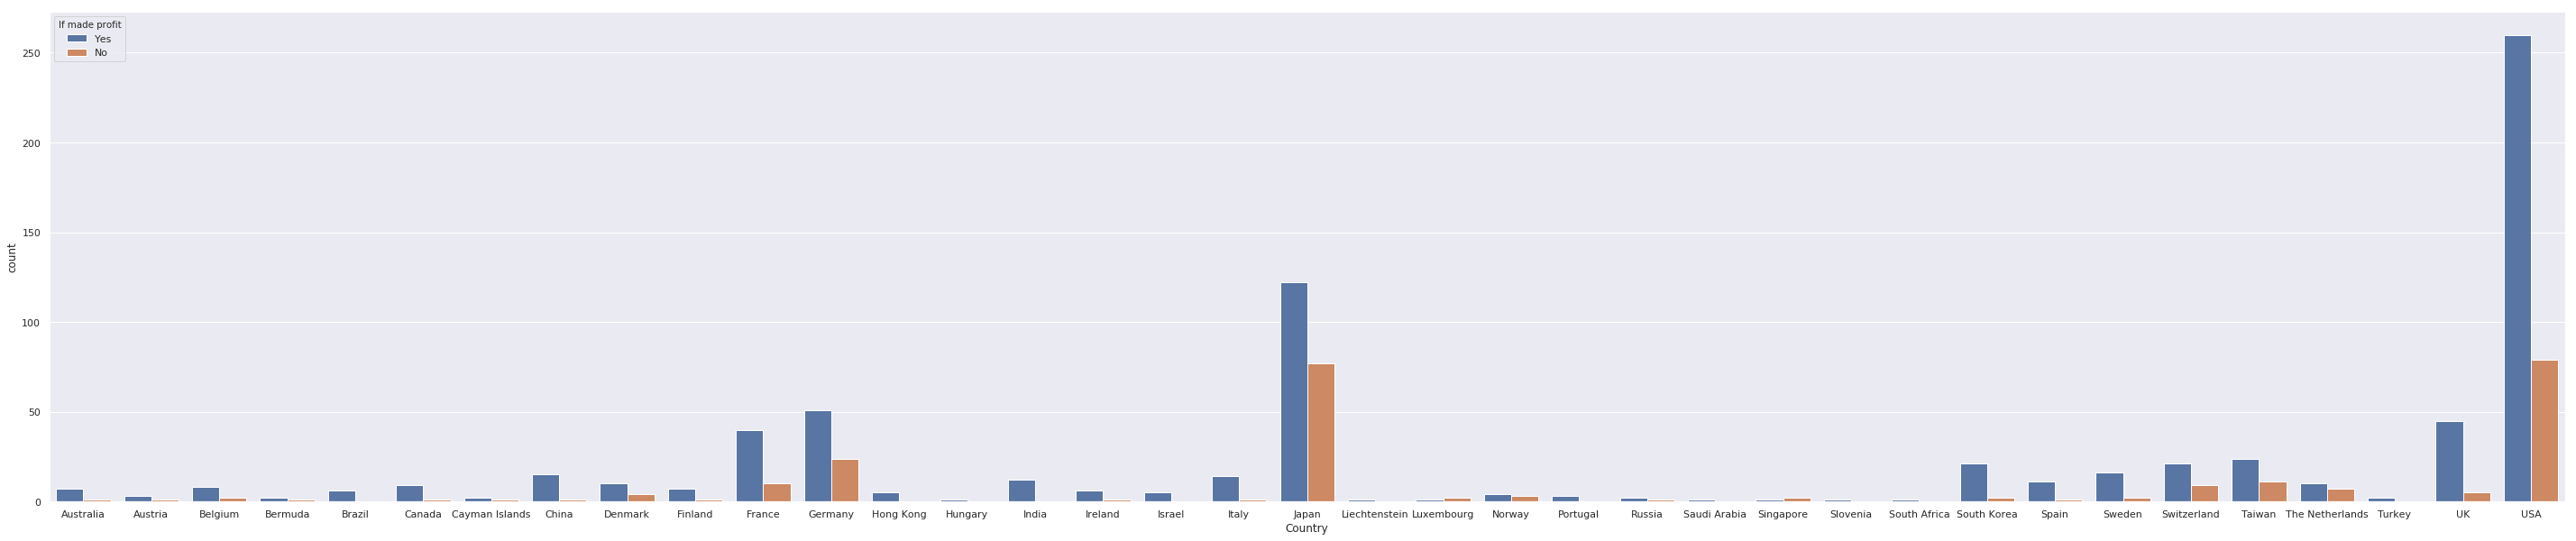

In [58]:
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(50, 10)})
sns.countplot('Country',data=TargetData, hue='If made profit')

In [59]:
df.describe().show()

+-------+--------------------+-----------------+---------+--------------------+--------+-----------------+------------------+--------------------+--------------+-------------------+---------------------------+---------------------------+----------------------------------+-----------------------+--------------------+------------------+--------------+----------------------+----------------------+-------------------------+------------------+------------------+------------------+------------------+----------------------+----------------------+------------------+----------------------------+----------------------------+---------------------+------------------+------------------+----------------------+-----------------+-----------------+-----------------+------------------+
|summary|             Company|       Company ID|  Country|       Country GDP $|Not IFRS|   Industry group|          ICB code|Industry description|Listing status|2009 R&D investment|1 Yr R&D investment growth%|4 Yr R&D inv

In [60]:
#Data cleaning
df.na.drop()

DataFrame[Company: string, Company ID: string, Country: string, Country GDP $: string, Not IFRS: string, Industry group: string, ICB code: string, Industry description: string, Listing status: string, 2009 R&D investment: string, 1 Yr R&D investment growth%: string, 4 Yr R&D investment growth%: string, R&D investment / operation profit%: string, R&D investment / sales%: string, R&D + capex / sales%: string, Operating profit: string, If made profit: string, 1 Yr operating profit%: string, 4 Yr operating profit%: string, Operating profit / sales%: string, Sales: string, 1 Yr sales growth%: string, 4 Yr sales growth%: string, Employees: string, 1 Yr employees growth%: string, 4 Yr employees growth%: string, R&D / employees : string, 1 Yr R&D / employees growth%: string, 4 Yr R&D / employees growth%: string, Sales outside region%: string, Market cap: string, Market cap change%: string, If market cap increase: string, R&D spend 2008: string, R&D spend 2007: string, R&D spend 2006: string, R

In [61]:
df.na.drop().count()

149

In [62]:
df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Company ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Country GDP $: string (nullable = true)
 |-- Not IFRS: string (nullable = true)
 |-- Industry group: string (nullable = true)
 |-- ICB code: string (nullable = true)
 |-- Industry description: string (nullable = true)
 |-- Listing status: string (nullable = true)
 |-- 2009 R&D investment: string (nullable = true)
 |-- 1 Yr R&D investment growth%: string (nullable = true)
 |-- 4 Yr R&D investment growth%: string (nullable = true)
 |-- R&D investment / operation profit%: string (nullable = true)
 |-- R&D investment / sales%: string (nullable = true)
 |-- R&D + capex / sales%: string (nullable = true)
 |-- Operating profit: string (nullable = true)
 |-- If made profit: string (nullable = true)
 |-- 1 Yr operating profit%: string (nullable = true)
 |-- 4 Yr operating profit%: string (nullable = true)
 |-- Operating profit / sales%: string (nullable = true)
 |-- 

In [17]:
df.show()

+--------------------+----------+---------+----------------+--------+--------------+--------+--------------------+--------------+-------------------+---------------------------+---------------------------+----------------------------------+-----------------------+--------------------+----------------+--------------+----------------------+----------------------+-------------------------+-----+------------------+------------------+---------+----------------------+----------------------+----------------+----------------------------+----------------------------+---------------------+----------+------------------+----------------------+--------------+--------------+--------------+--------------+
|             Company|Company ID|  Country|   Country GDP $|Not IFRS|Industry group|ICB code|Industry description|Listing status|2009 R&D investment|1 Yr R&D investment growth%|4 Yr R&D investment growth%|R&D investment / operation profit%|R&D investment / sales%|R&D + capex / sales%|Operating profi

In [18]:
df2 = df.withColumnRenamed("Country GDP $","GDP").withColumnRenamed("2009 R&D investment","2009_RD_investment").withColumnRenamed("Industry description","Industry_description").withColumnRenamed("1 Yr R&D investment growth%","1_Yr_RD_investment_growth").withColumnRenamed("Operating profit","Operating_profit").withColumnRenamed("1 Yr operating profit%","1_Yr_operating_profit").withColumnRenamed("1 Yr sales growth%","1_Yr_sales_growth").withColumnRenamed("Sales outside region%", "Sales_outside_region").withColumnRenamed("Market cap","Market_cap").withColumnRenamed("Market cap change%","Market_cap_change").withColumnRenamed("R&D spend 2008","RD_spend_2008")
df2.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Company ID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- GDP: string (nullable = true)
 |-- Not IFRS: string (nullable = true)
 |-- Industry group: string (nullable = true)
 |-- ICB code: string (nullable = true)
 |-- Industry_description: string (nullable = true)
 |-- Listing status: string (nullable = true)
 |-- 2009_RD_investment: string (nullable = true)
 |-- 1_Yr_RD_investment_growth: string (nullable = true)
 |-- 4 Yr R&D investment growth%: string (nullable = true)
 |-- R&D investment / operation profit%: string (nullable = true)
 |-- R&D investment / sales%: string (nullable = true)
 |-- R&D + capex / sales%: string (nullable = true)
 |-- Operating_profit: string (nullable = true)
 |-- If made profit: string (nullable = true)
 |-- 1_Yr_operating_profit: string (nullable = true)
 |-- 4 Yr operating profit%: string (nullable = true)
 |-- Operating profit / sales%: string (nullable = true)
 |-- Sales: string 

In [47]:
df3 = df2.selectExpr("Company",
                    "cast(Sales as double) Sales",
                    "Country",
                    "cast(Operating_profit as double) Operating_profit",
                    "cast(2009_RD_investment as double) 2009_RD_investment",
                    "cast(Employees as double) Employees",
                    "cast(Market_cap as double) Market_cap")
df3.printSchema()
df3.show()

root
 |-- Company: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Operating_profit: double (nullable = true)
 |-- 2009_RD_investment: double (nullable = true)
 |-- Employees: double (nullable = true)
 |-- Market_cap: double (nullable = true)

+--------------------+-------+---------+----------------+------------------+---------+----------+
|             Company|  Sales|  Country|Operating_profit|2009_RD_investment|Employees|Market_cap|
+--------------------+-------+---------+----------------+------------------+---------+----------+
|Australia & New Z...| 7321.0|Australia|          2439.0|            228.89|  37687.0|   31492.0|
|Commonwealth Bank...| 9175.0|Australia|          3592.0|            196.04|  44218.0|   44232.0|
|National Australi...| 9343.0|Australia|          2775.0|            190.47|  38953.0|   28249.0|
|  Telstra, Australia|14205.0|Australia|          3661.0|            785.25|  43181.0|   20157.0|
|Aristocrat 

In [79]:
df4 = df3.na.drop()
df4.count()

856

In [80]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['Operating_profit',
 '2009_RD_investment',
 'Employees',
 'Market_cap'],
outputCol="features")
output = assembler.transform(df4)
output.printSchema()
output.show()

root
 |-- Company: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Operating_profit: double (nullable = true)
 |-- 2009_RD_investment: double (nullable = true)
 |-- Employees: double (nullable = true)
 |-- Market_cap: double (nullable = true)
 |-- features: vector (nullable = true)

+--------------------+-------+---------+----------------+------------------+---------+----------+--------------------+
|             Company|  Sales|  Country|Operating_profit|2009_RD_investment|Employees|Market_cap|            features|
+--------------------+-------+---------+----------------+------------------+---------+----------+--------------------+
|Australia & New Z...| 7321.0|Australia|          2439.0|            228.89|  37687.0|   31492.0|[2439.0,228.89,37...|
|Commonwealth Bank...| 9175.0|Australia|          3592.0|            196.04|  44218.0|   44232.0|[3592.0,196.04,44...|
|National Australi...| 9343.0|Australia|          2775.0|      

In [81]:
model_data = output.select("features","Sales")
model_data.show()

+--------------------+-------+
|            features|  Sales|
+--------------------+-------+
|[2439.0,228.89,37...| 7321.0|
|[3592.0,196.04,44...| 9175.0|
|[2775.0,190.47,38...| 9343.0|
|[3661.0,785.25,43...|14205.0|
|[668.0,173.54,103...| 2574.0|
|[97.0,53.74,1888....|  387.0|
|[237.0,102.7,1110...| 4033.0|
|[-29.0,58.9,403.0...|   55.0|
|[130.0,43.76,1304...| 2841.0|
|[308.0,96.67,4164...| 7597.0|
|[1247.0,75.52,272...| 5441.0|
|[-2471.0,67.53,56...| 4718.0|
|[1115.0,47.09,168...| 5262.0|
|[306.0,598.85,932...| 2769.0|
|[6355.0,98.46,116...|22762.0|
|[146.0,134.16,115...| 2448.0|
|[-65.0,54.36,3310...|  567.0|
|[236.0,56.36,1810...| 2166.0|
|[683.0,502.89,282...| 7539.0|
|[121.0,120.57,971...| 6177.0|
+--------------------+-------+
only showing top 20 rows



In [82]:
train_data,test_data = model_data.randomSplit([0.8,0.2])
train_data.show()

+--------------------+--------+
|            features|   Sales|
+--------------------+--------+
|[-4325.0,6013.74,...|136559.0|
|[-2599.0,3445.06,...| 51655.0|
|[-2595.0,559.0,19...| 38690.0|
|[-2471.0,67.53,56...|  4718.0|
|[-2223.0,2516.12,...| 44265.0|
|[-2221.0,1459.8,1...| 29106.0|
|[-2181.0,331.91,7...|  6513.0|
|[-1842.0,1227.52,...|  5602.0|
|[-1759.0,3029.78,...| 56121.0|
|[-1683.0,257.66,1...| 36040.0|
|[-1646.0,590.13,4...|  6072.0|
|[-1520.0,3307.93,...| 50776.0|
|[-1413.0,1300.6,5...| 18939.0|
|[-1355.0,117.28,1...| 42849.0|
|[-1220.0,2055.98,...| 43018.0|
|[-1207.0,2770.59,...| 66521.0|
|[-1181.0,214.47,5...|  2202.0|
|[-1122.0,412.85,4...|  7674.0|
|[-1058.0,437.07,1...|  3245.0|
|[-1057.0,59.26,51...|  4410.0|
+--------------------+--------+
only showing top 20 rows



In [83]:
from pyspark.ml.regression import LinearRegression

In [84]:
lr = LinearRegression(labelCol='Sales')

In [85]:
lrModel = lr.fit(train_data)

In [86]:
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [2.1667281934710645,2.78137712307252,0.11388333781690699,0.2203143616168274] Intercept: 184.02481116980144


In [87]:
test_results = lrModel.evaluate(test_data)

In [88]:
test_results.residuals.show()

print("RSME: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|    9582.9728288142|
|  8057.155024593623|
|  5084.750841164885|
| 2405.3030640164357|
| 4363.8952755482815|
|  3352.949451407898|
|  4885.680632894415|
|  2658.886134866456|
| 136.57619796838708|
|  286.1448485644603|
| 1276.8853721600867|
|   8213.57484355157|
|  415.7266239176206|
|-1783.1804660854386|
|-177.37302509661276|
| 3125.0699703557884|
| -569.2364175049333|
|  25.06624752982492|
|  698.3064807706432|
|-235.56931989326358|
+-------------------+
only showing top 20 rows

RSME: 8640.848968645289


In [89]:
print("R2: {}".format(test_results.r2))

R2: 0.6879419956752286


In [90]:
trainingSummary = lrModel.summary

In [91]:
print("Deviance Residuals: " +str(trainingSummary.devianceResiduals))
print("Coefficient Standard Errors: " +str(trainingSummary.coefficientStandardErrors))
print("Explained Variance: " +str(trainingSummary.explainedVariance))
print("Features Col: " +str(trainingSummary.featuresCol))
print("Label Col: " +str(trainingSummary.labelCol))
print("Mean Absolute Error: " +str(trainingSummary.meanAbsoluteError))
print("Mean Squared Error: " +str(trainingSummary.meanSquaredError))
print("Num Instances: " +str(trainingSummary.numInstances))
print("Objective History: " +str(trainingSummary.objectiveHistory))
print("PValues: " +str(trainingSummary.pValues))
print("Prediction Col: " +str(trainingSummary.predictionCol))
print("R2: " +str(trainingSummary.r2))
print("Root Mean Squared Error: " +str(trainingSummary.rootMeanSquaredError))
print("TValues: " +str(trainingSummary.tValues))
print("Total Iterations: " +str(trainingSummary.totalIterations))

Deviance Residuals: [-47793.25395672888, 108275.00667536427]
Coefficient Standard Errors: [0.3188040680694874, 0.7248652755766982, 0.0075625832853041175, 0.04436131156257767, 521.6065436926772]
Explained Variance: 266081661.49671704
Features Col: features
Label Col: Sales
Mean Absolute Error: 4711.828761660059
Mean Squared Error: 124023729.85901089
Num Instances: 675
Objective History: [0.0]
PValues: [2.3733903731226746e-11, 0.00013627048195874458, 0.0, 8.667040143350846e-07, 0.7243464371747206]
Prediction Col: prediction
R2: 0.6820763501165852
Root Mean Squared Error: 11136.594176812356
TValues: [6.796425800309419, 3.837095273821296, 15.058787919494277, 4.9663626672995, 0.35280387754917836]
Total Iterations: 1


In [93]:
predict_model = lr.fit(test_data)
test_results = predict_model.evaluate(test_data)
test_results.predictions.show(10)

+--------------------+-------+-------------------+
|            features|  Sales|         prediction|
+--------------------+-------+-------------------+
|[-4139.0,113.73,6...| 9727.0| -5055.002249873933|
|[-1772.0,2305.05,...|28041.0| 13196.948462855447|
|[-1562.0,1343.43,...|18938.0| 7117.2139763285395|
|[-1251.0,58.41,39...| 1014.0|-2813.7622470495385|
|[-1183.0,660.15,1...| 5833.0|-2001.4562657553784|
|[-1005.0,156.67,2...|40318.0| 40000.664442029716|
|[-902.0,104.65,59...|11608.0|  6778.187502537703|
|[-618.0,45.39,123...| 3364.0|  876.5156684784098|
|[-437.0,56.16,320...| 3686.0|  4522.337622857567|
|[-365.0,54.8,1500...| 1719.0| 2233.0975923063816|
+--------------------+-------+-------------------+
only showing top 10 rows

